### AI Bootcamp - June 2024 Cohort - Analyzing and Predicting Flight Delays
Documentation and Context: See the project's ReadMe.md file for documentation on the column names and purposes.

### What's in this workbook?
This is a starter Jupyter Notebook for the project team to use when building out various machine learning models. Each team member will create a copy of this notebook for their work. 

## Libraries Imported
* Pandas
* Numpy
* Matplotlib
* sklearn
    * StandardScaler
    * PCA
    * LabelEncoder

In [31]:
# Do imports
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


### Read In Data to Dataframe

In [32]:
# Create DataFrame
df = pd.read_csv('./data/Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [33]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [34]:
len(df['AirportFrom'].unique())

293

In [35]:
df['Time_encoded'] = df['Time'].apply(lambda x: f"{x // 60:02d}:{x % 60:02d}")
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Time_encoded
0,1,CO,269,SFO,IAH,3,15,205,1,00:15
1,2,US,1558,PHX,CLT,3,15,222,1,00:15
2,3,AA,2400,LAX,DFW,3,20,165,1,00:20
3,4,AA,2466,SFO,DFW,3,20,195,1,00:20
4,5,AS,108,ANC,SEA,3,30,202,0,00:30


### Preprocessing : Encoding 'AirportFrom', 'AirportTo', 'Airline' Columns

In [36]:
airport_codes = df['AirportFrom'].unique()
airport_codes

array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

### Make a copy of Dataframe for preprocessing

In [37]:
encoded_df = df.copy()

In [38]:
unique_codes = encoded_df['AirportFrom'].unique()
code_to_id = {code: idx for idx, code in enumerate(unique_codes, start=1)}

# Apply the mapping to create a new column with unique IDs
encoded_df['AirportFroIDs'] = encoded_df['AirportFrom'].map(code_to_id)
encoded_df['AirportToIDs'] = encoded_df['AirportTo'].map(code_to_id)

encoded_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Time_encoded,AirportFroIDs,AirportToIDs
0,1,CO,269,SFO,IAH,3,15,205,1,00:15,1,103
1,2,US,1558,PHX,CLT,3,15,222,1,00:15,2,109
2,3,AA,2400,LAX,DFW,3,20,165,1,00:20,3,72
3,4,AA,2466,SFO,DFW,3,20,195,1,00:20,1,72
4,5,AS,108,ANC,SEA,3,30,202,0,00:30,4,22
...,...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,23:59,194,229
539379,539380,FL,398,SEA,ATL,5,1439,305,0,23:59,22,55
539380,539381,FL,609,SFO,MKE,5,1439,255,0,23:59,1,17
539381,539382,UA,78,HNL,SFO,5,1439,313,1,23:59,12,1


In [39]:
# Get unique airline codes
unique_airlines = encoded_df['Airline'].unique()

# Create a random mapping for each unique airline code
random.seed(42)  # Set a seed for reproducibility, remove if you want different random results each time
airline_to_id = {airline: random.randint(1000, 9999) for airline in unique_airlines}

# Apply the random mapping to the airline column
encoded_df['airline_id'] = encoded_df['Airline'].map(airline_to_id)

encoded_df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Time_encoded,AirportFroIDs,AirportToIDs,airline_id
0,1,CO,269,SFO,IAH,3,15,205,1,00:15,1,103,2824
1,2,US,1558,PHX,CLT,3,15,222,1,00:15,2,109,1409
2,3,AA,2400,LAX,DFW,3,20,165,1,00:20,3,72,5506
3,4,AA,2466,SFO,DFW,3,20,195,1,00:20,1,72,5506
4,5,AS,108,ANC,SEA,3,30,202,0,00:30,4,22,5012


In [40]:
len(encoded_df["AirportFrom"].unique())

293

In [41]:
len(encoded_df["AirportTo"].unique())

293

In [42]:
# Drop all the categorical columns
encoded_df = encoded_df.drop(columns=['Airline', 'AirportFrom', 'AirportTo', 'id', 'Time_encoded'])
encoded_df.head()

,id,Flight,DayOfWeek,Time,Length,Delay,Time_encoded,AirportFroIDs,AirportToIDs,airline_id
0,1,269,3,15,205,1,00:15,1,103,2824
1,2,1558,3,15,222,1,00:15,2,109,1409
2,3,2400,3,20,165,1,00:20,3,72,5506
3,4,2466,3,20,195,1,00:20,1,72,5506
4,5,108,3,30,202,0,00:30,4,22,5012


In [43]:
encoded_df = encoded_df.drop(columns=['id', 'Time_encoded'])
encoded_df.head()

,Flight,DayOfWeek,Time,Length,Delay,AirportFroIDs,AirportToIDs,airline_id
0,269,3,15,205,1,1,103,2824
1,1558,3,15,222,1,2,109,1409
2,2400,3,20,165,1,3,72,5506
3,2466,3,20,195,1,1,72,5506
4,108,3,30,202,0,4,22,5012


#### KNN Model

In [44]:
# Define features set
X = encoded_df.copy()
X.drop("Delay", axis=1, inplace=True)
X.head()

,Flight,DayOfWeek,Time,Length,AirportFroIDs,AirportToIDs,airline_id
0,269,3,15,205,1,103,2824
1,1558,3,15,222,2,109,1409
2,2400,3,20,165,3,72,5506
3,2466,3,20,195,1,72,5506
4,108,3,30,202,4,22,5012


In [45]:
# Define target vector
y = encoded_df["Delay"]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Delay, dtype: int64

In [46]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [47]:
# Create a StandardScaler() model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [48]:
# Transform training and testing data by using the X_scaler model
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### K-nearest Neighbors

k: 1, Train/Test Score: 0.805/0.592
k: 3, Train/Test Score: 0.787/0.606
k: 5, Train/Test Score: 0.744/0.613
k: 7, Train/Test Score: 0.721/0.619
k: 9, Train/Test Score: 0.707/0.623
k: 11, Train/Test Score: 0.699/0.627
k: 13, Train/Test Score: 0.692/0.630
k: 15, Train/Test Score: 0.687/0.631
k: 17, Train/Test Score: 0.684/0.632
k: 19, Train/Test Score: 0.680/0.633


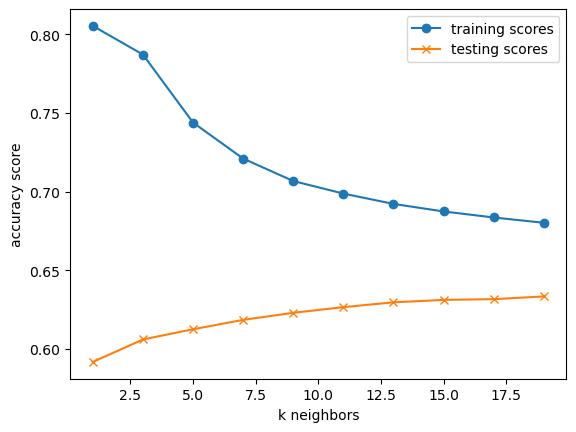

In [49]:
# Loop through different k values to find which has the highest accuracy
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [50]:
# Choose the best value for k, and refit the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Print the score for the test data
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.606


## PCA Analysis 

In [51]:
# Fit the PCA model on the tranformed airline delay data
flight_delay_df_pca = encoded_df.copy()

In [52]:
# Set feature and target variables
X1 = flight_delay_df_pca.drop(columns=['Delay'])
y1 = flight_delay_df_pca["Delay"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#### Applying StandardScaler()

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [55]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

In [56]:
print("PCA-transformed training data shape:", X_train_pca.shape)
print("PCA-transformed testing data shape:", X_test_pca.shape)

PCA-transformed training data shape: (431506, 2)
PCA-transformed testing data shape: (107877, 2)


In [57]:
# PCA Explained variance ratio
pca.explained_variance_ratio_

array([0.22037639, 0.16196673])

k: 1, Train/Test Score: 0.796/0.593
k: 3, Train/Test Score: 0.786/0.610
k: 5, Train/Test Score: 0.744/0.617
k: 7, Train/Test Score: 0.720/0.622
k: 9, Train/Test Score: 0.707/0.626
k: 11, Train/Test Score: 0.699/0.630
k: 13, Train/Test Score: 0.692/0.632
k: 15, Train/Test Score: 0.687/0.635
k: 17, Train/Test Score: 0.683/0.635
k: 19, Train/Test Score: 0.680/0.636


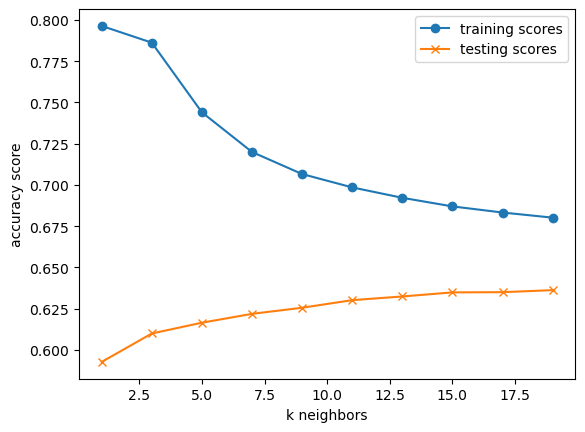

In [58]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

### Noted: Based on the PCA explained variance ratio above the first two components cover 99% of the data which is why two components would be more optimal based on this data.

In [59]:
# Instantiate the PCA instance with two components instead of three
pca = PCA(n_components=2)

In [60]:
# Refit the PCA model on the tranformed airline delay data
flight_delay_df_pca = encoded_df.copy()

flight_delay_df_pca = pca.fit_transform(flight_delay_df_pca)

# Review the first 5 rows of updated list data
flight_delay_df_pca[:5]

array([[-2561.85906885, -1039.1716171 ],
       [-3166.54477011,   776.64253005],
       [  819.61263542,  -490.49963613],
       [  851.7243669 ,  -433.26797817],
       [ -731.60981562, -2249.16170733]])

In [61]:
# PCA Explained variance ratio
pca.explained_variance_ratio_

array([0.668743  , 0.32276869])

In [62]:
# Create the PCA DataFrame
flight_delay_df_pca = pd.DataFrame(
    flight_delay_df_pca,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
flight_delay_df_pca.head(10)

,PCA1,PCA2
0,-2561.859069,-1039.171617
1,-3166.544770,776.642530
2,819.612635,-490.499636
3,851.724367,-433.267978
4,-731.609816,-2249.161707
5,-2158.570375,-319.226968
6,-230.204184,-627.739883
7,235.988742,204.777684
8,179.332742,103.329409
9,886.904823,-370.567012


In [63]:
# Determine which feature has the stronger influence on each principal component. 
# Use the columns from the original DataFrame. FYI: The data has already been scaled and fitted.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=encoded_df.columns)
pca_component_weights

,PCA1,PCA2
Flight,0.488680,0.872366
DayOfWeek,0.000002,-0.000002
Time,0.000977,-0.002284
Length,-0.004687,-0.011251
Delay,-0.000004,-0.000011
AirportFroIDs,0.000276,0.003481
AirportToIDs,0.000285,0.003561
airline_id,0.872450,-0.488693


#### PCA 1 : 'airline_id' and 'Flight' columns .
#### PCA 2 : 'Flight' column has the strongest influece on pca 2.

## KNN Model With PCA Data

In [86]:
from sklearn.model_selection import GridSearchCV

In [90]:
# Try with different number of components
for n in [5, 10, 15, 20]:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Fit and evaluate the model
    knn.fit(X_train_pca, y_train)
    print(f'Number of PCA components: {n}, Accuracy: {knn.score(X_test_pca, y_test)}')


InvalidParameterError: The 'n_neighbors' parameter of KNeighborsClassifier must be an int in the range [1, inf) or None. Got KNeighborsClassifier(metric='euclidean', n_neighbors=11) instead.

In [87]:
pca = PCA(n_components=2)  # Reduce to 1 principal component for illustration
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [88]:
knn = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

In [89]:
knn = KNeighborsClassifier(n_neighbors=best_knn)  # You can adjust the number of neighbors as needed
knn.fit(X_train_pca, y_train)

InvalidParameterError: The 'n_neighbors' parameter of KNeighborsClassifier must be an int in the range [1, inf) or None. Got KNeighborsClassifier(metric='euclidean', n_neighbors=11) instead.

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
# Make predictions and evaluate
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

In [85]:
print(f'Accuracy of KNN model after PCA: {accuracy}')

Accuracy of KNN model after PCA: 0.6444191069458736
